In [1]:
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve

In [3]:
#import the dataset
data=pd.read_csv("C:\\Users\\APOORVA  SHARMA\\Downloads\\diabetes.csv")

In [4]:
# it will read the top 5 data of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# describes the number of rows and columns
data.shape

(768, 9)

In [6]:
# it describes the datatype of the each columns of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

<AxesSubplot:xlabel='Insulin', ylabel='Age'>

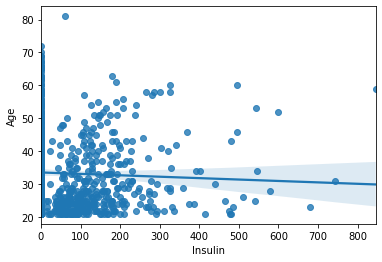

In [9]:
# Visualize the data for Insulin(take care of the cases)
# regplot refers to regression plot
sns.regplot(x="Insulin",y="Age",data=data)

<AxesSubplot:xlabel='Glucose', ylabel='Age'>

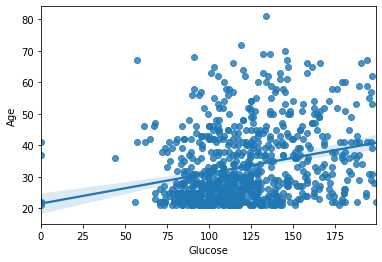

In [10]:
# visualize the data for glucose
sns.regplot(x='Glucose',y='Age',data=data)

<AxesSubplot:xlabel='BMI', ylabel='Age'>

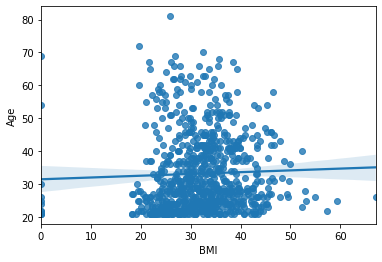

In [11]:
#visualize the data for BMI
sns.regplot(x='BMI',y='Age',data=data)

<AxesSubplot:xlabel='BloodPressure', ylabel='Age'>

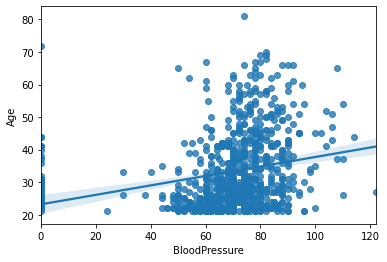

In [12]:
# visualize the data for BloodPressure
sns.regplot(x='BloodPressure',y='Age',data=data)

<AxesSubplot:xlabel='SkinThickness', ylabel='Age'>

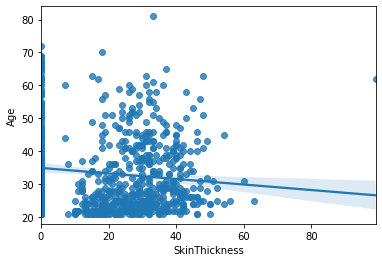

In [13]:
#visualize the data for SkinThickness
sns.regplot(x='SkinThickness',y='Age',data=data)

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

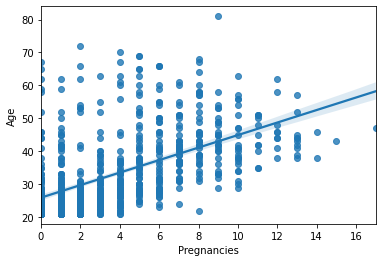

In [14]:
sns.regplot(x='Pregnancies',y='Age',data=data)

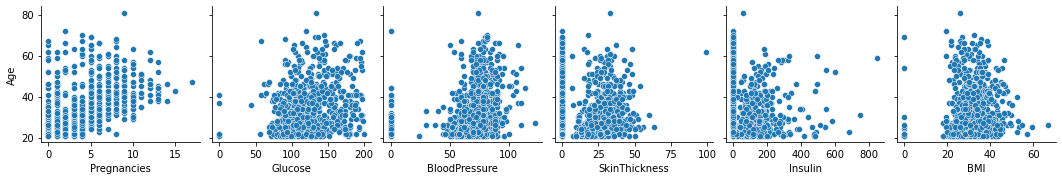

In [15]:
sns.pairplot(data=data,x_vars=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI'],y_vars='Age')

In [16]:
# correlation between all of the variables
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

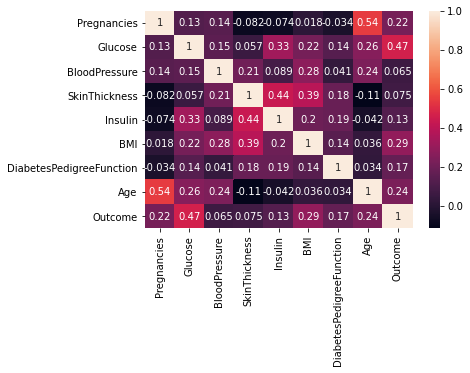

In [18]:
sns.heatmap(data.corr(),annot=True)

In [19]:
X = data['Outcome']
y = data['Outcome']

In [31]:
# 2 datasets
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = data['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [33]:
target_count()
target_percent()

NameError: name 'go' is not defined

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=100)
print(len(X_train))
print(len(X_test))

614
154


In [107]:
X_train.shape
X_test.shape

(154,)

In [108]:
X_train.head()

660   NaN
69    NaN
85    NaN
219   NaN
712   NaN
Name: Outcome, dtype: float64

In [109]:
X_train_lm=X_train.values.reshape(-1,1)
X_train_lm.shape
X_test_lm=X_test.values.reshape(-1,1)
X_test_lm.shape

(154, 1)

In [110]:
lm=LinearRegression()
lm.fit(X_train_lm,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [96]:
def model_prediction(algorithm, X_train, X_test, y_train):
  algorithm_fit = algorithm.fit(X_train, y_train)
  predictions  = algorithm.predict(X_test)
  probabilities = algorithm.predict_proba(X_test)
  return algorithm_fit, predictions, probabilities

In [97]:
def prediction(algorithm, X_train, X_test, y_train, y_test) :
    
    # model prediction
    algorithm_fit, predictions, probabilities = model_prediction(algorithm, X_train, X_test, y_train)

    # print summary
    print ("\n Classification report : \n", classification_report(y_test, predictions))
    print ("Accuracy   Score : ", accuracy_score(y_test, predictions))

    # plot confusion matrix 
    plot_confusion_matrix(algorithm_fit, X_test, y_test, cmap=plt.cm.Blues,display_labels=['No Diabetes','Diabetes'])
    plt.title('Confusion Matrix')
    
    # plot roc curve
    plot_roc_curve(algorithm_fit, X_test, y_test)
    ax = plt.gca()
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r')
    plt.title('Receiver Operating Characteristic')

In [103]:
# rescale the features
scaler = MinMaxScaler()